#Fall Detection and Analytics
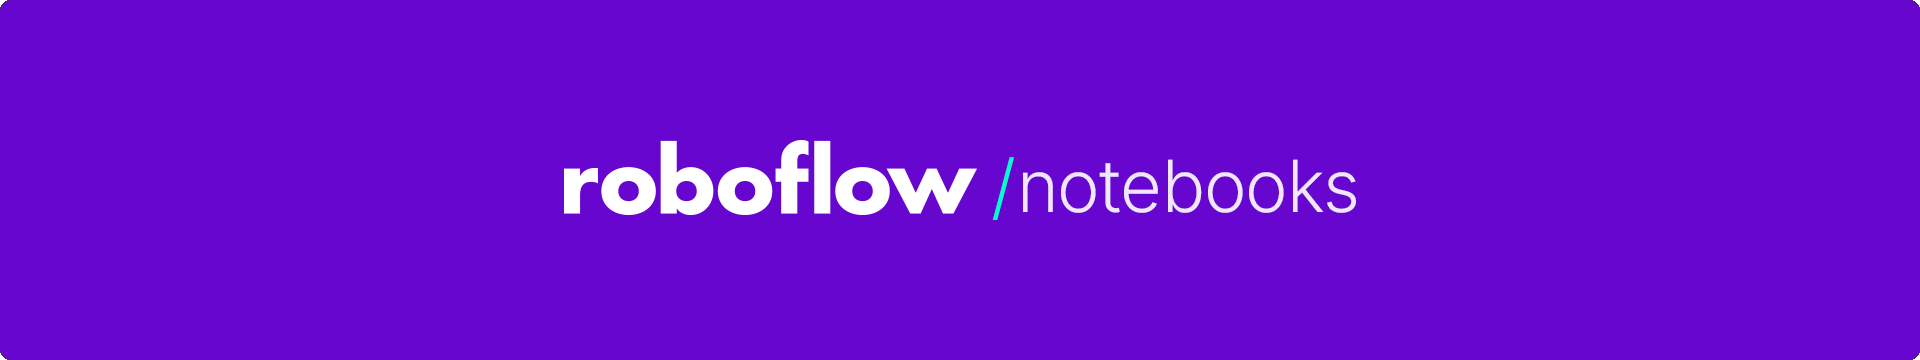

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

Mon Mar 31 09:37:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image
!pip install roboflow

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.5/112.6 GB disk)


In [2]:
!mkdir -p '/content/drive/MyDrive/Colab Notebooks/Main data sci'
%cd '/content/drive/MyDrive/Colab Notebooks/Main data sci'


# !pip install roboflow==1.1.48 --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("kkaovsp").project("main-fall-detection")
version = project.version(1)
dataset = version.download("yolov8")
# 5914b4f9-d7a6-4c5f-b5c8-ca5e4451e23a

/content/drive/MyDrive/Colab Notebooks/Main data sci
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Main-Fall-detection-1 in yolov8:: 100%|██████████| 774/774 [00:06<00:00, 127.44it/s]


In [3]:
!pip install ultralytics
!yolo task=detect mode=train model=yolov8s.pt data='/content/drive/MyDrive/Colab Notebooks/Main data sci/Main-Fall-detection-1/data.yaml' epochs=25 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 116MB/s] 
New https://pypi.org/project/ultralytics/8.3.99 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Colab Notebooks/Main data sci/Main-Fall-detection-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, 

In [7]:
!yolo task=detect mode=predict model='/content/drive/MyDrive/Colab Notebooks/Main data sci/runs/detect/train/weights/last.pt' conf=0.8 source='/content/drive/MyDrive/Colab Notebooks/Main data sci/Main-Fall-detection-1/test/images/107_jpg.rf.14097deed340b114145c57f88ff48ac6.jpg' save=True

Ultralytics YOLOv8.2.103 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/drive/MyDrive/Colab Notebooks/Main data sci/Main-Fall-detection-1/test/images/107_jpg.rf.14097deed340b114145c57f88ff48ac6.jpg: 800x480 1 Fall, 47.9ms
Speed: 3.7ms preprocess, 47.9ms inference, 163.6ms postprocess per image at shape (1, 3, 800, 480)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


[Errno 2] No such file or directory: '{HOME}'
/content/drive/MyDrive/Colab Notebooks/Main data sci


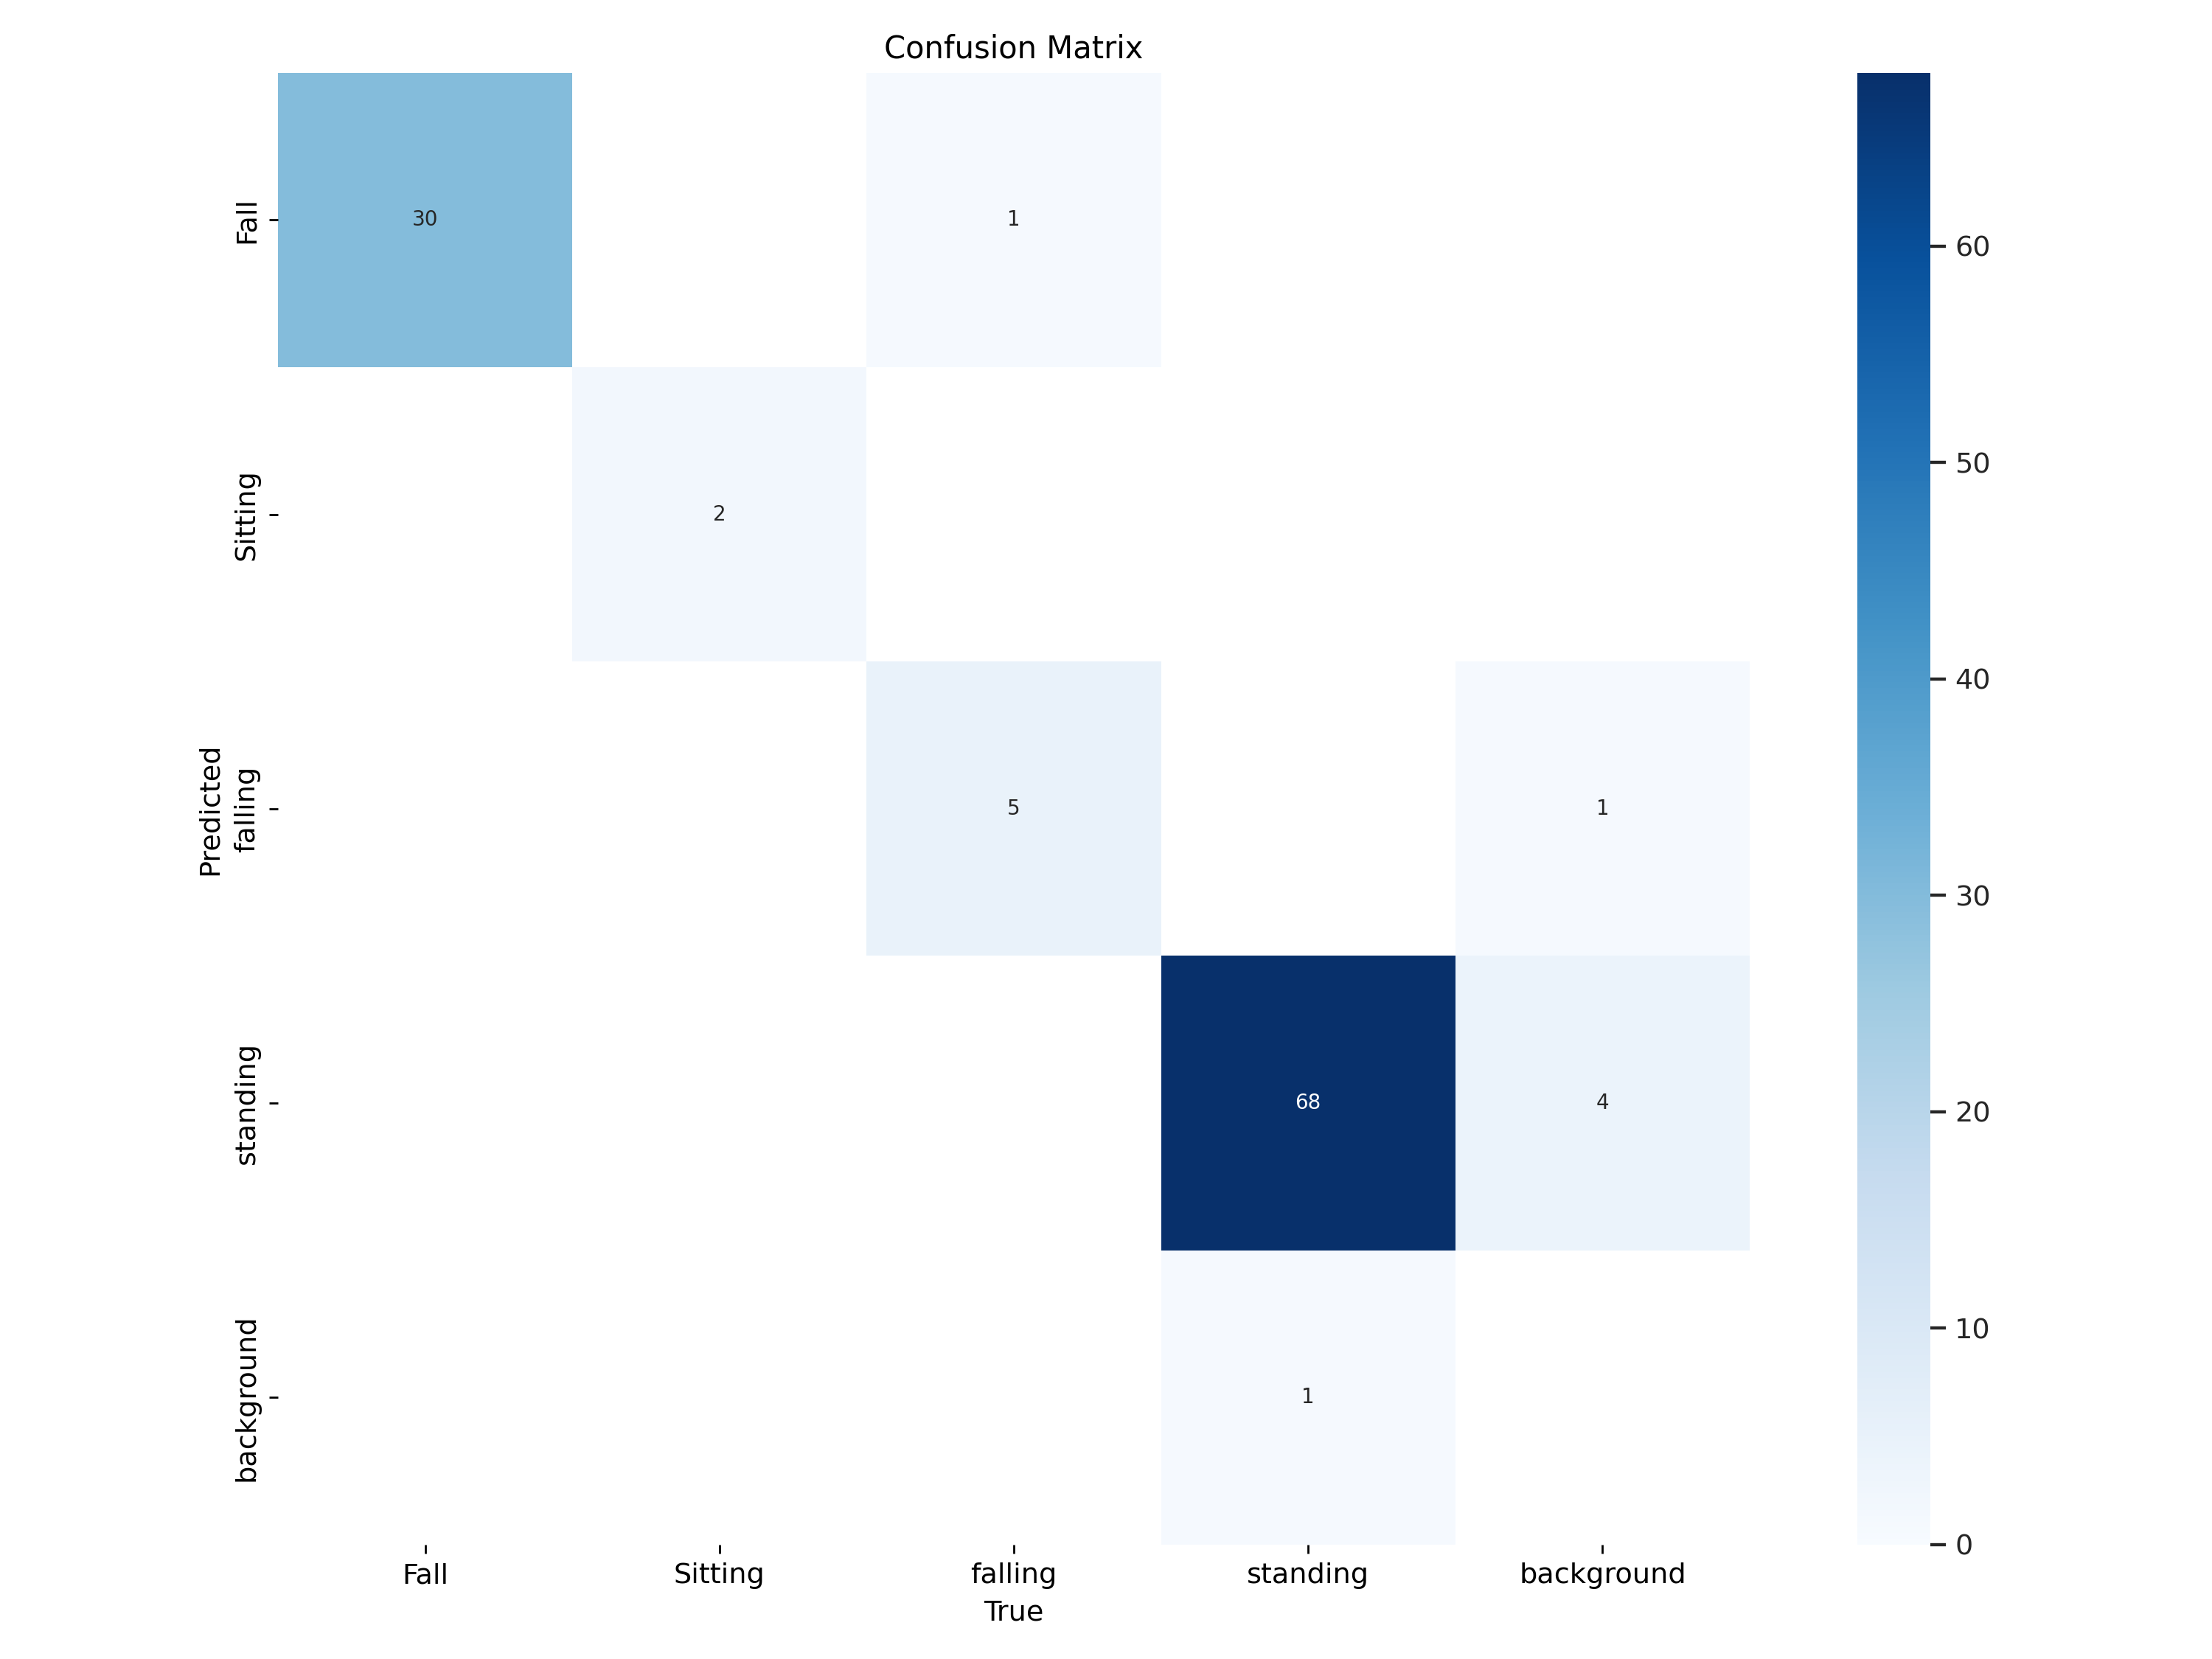

In [8]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/Colab Notebooks/Main data sci/runs/detect/train/confusion_matrix.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content/drive/MyDrive/Colab Notebooks/Main data sci


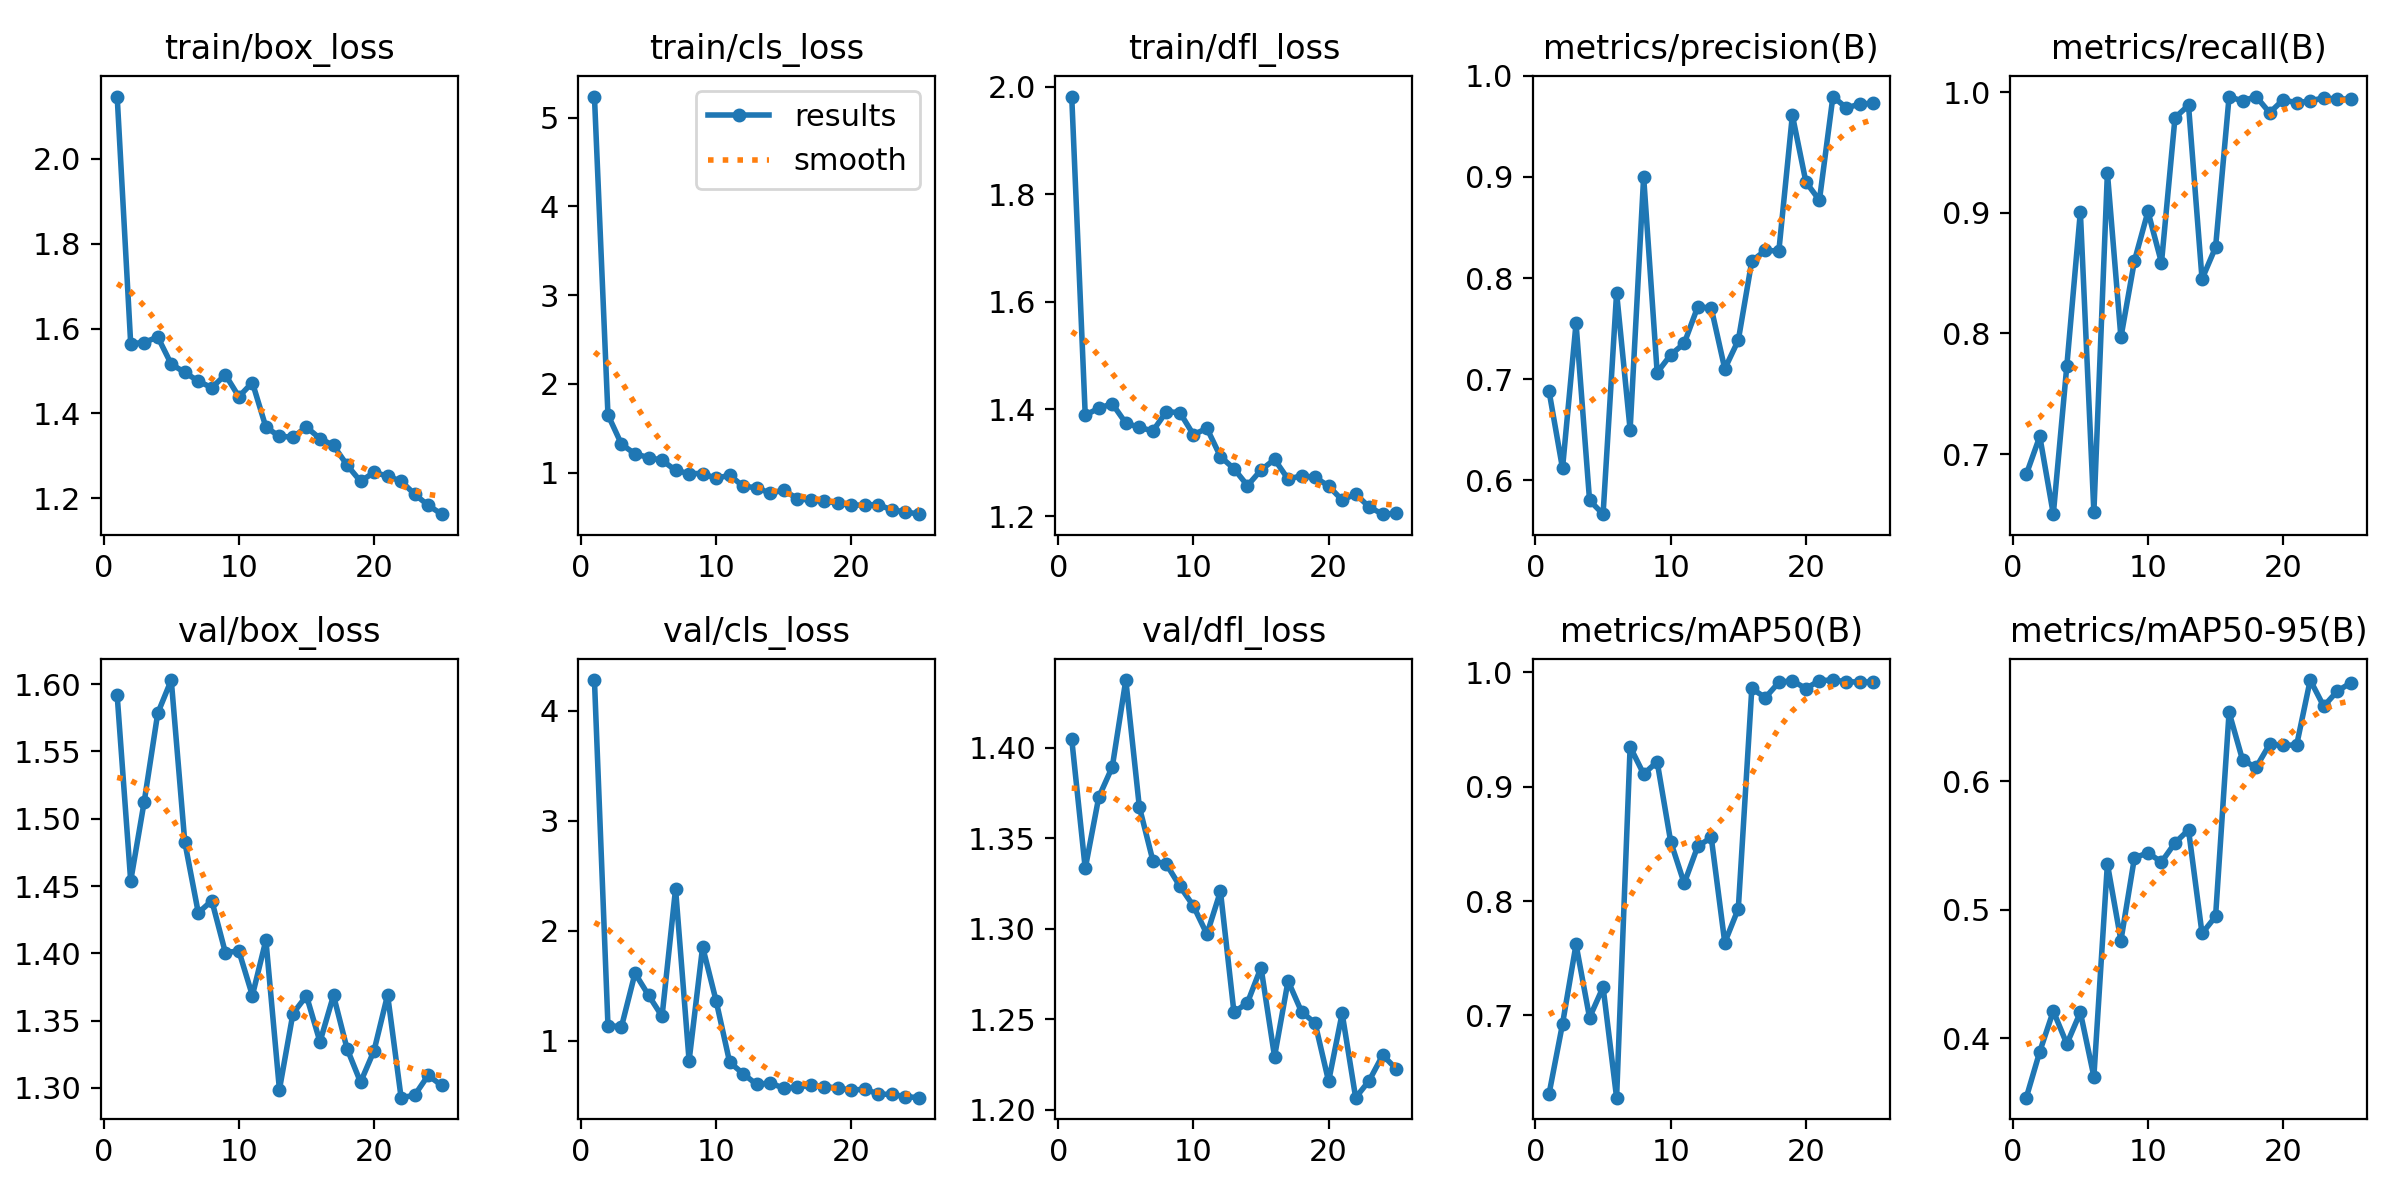

In [9]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/Colab Notebooks/Main data sci/runs/detect/train/results.png', width=600)

[Errno 2] No such file or directory: '{HOME}'
/content/drive/MyDrive/Colab Notebooks/Main data sci


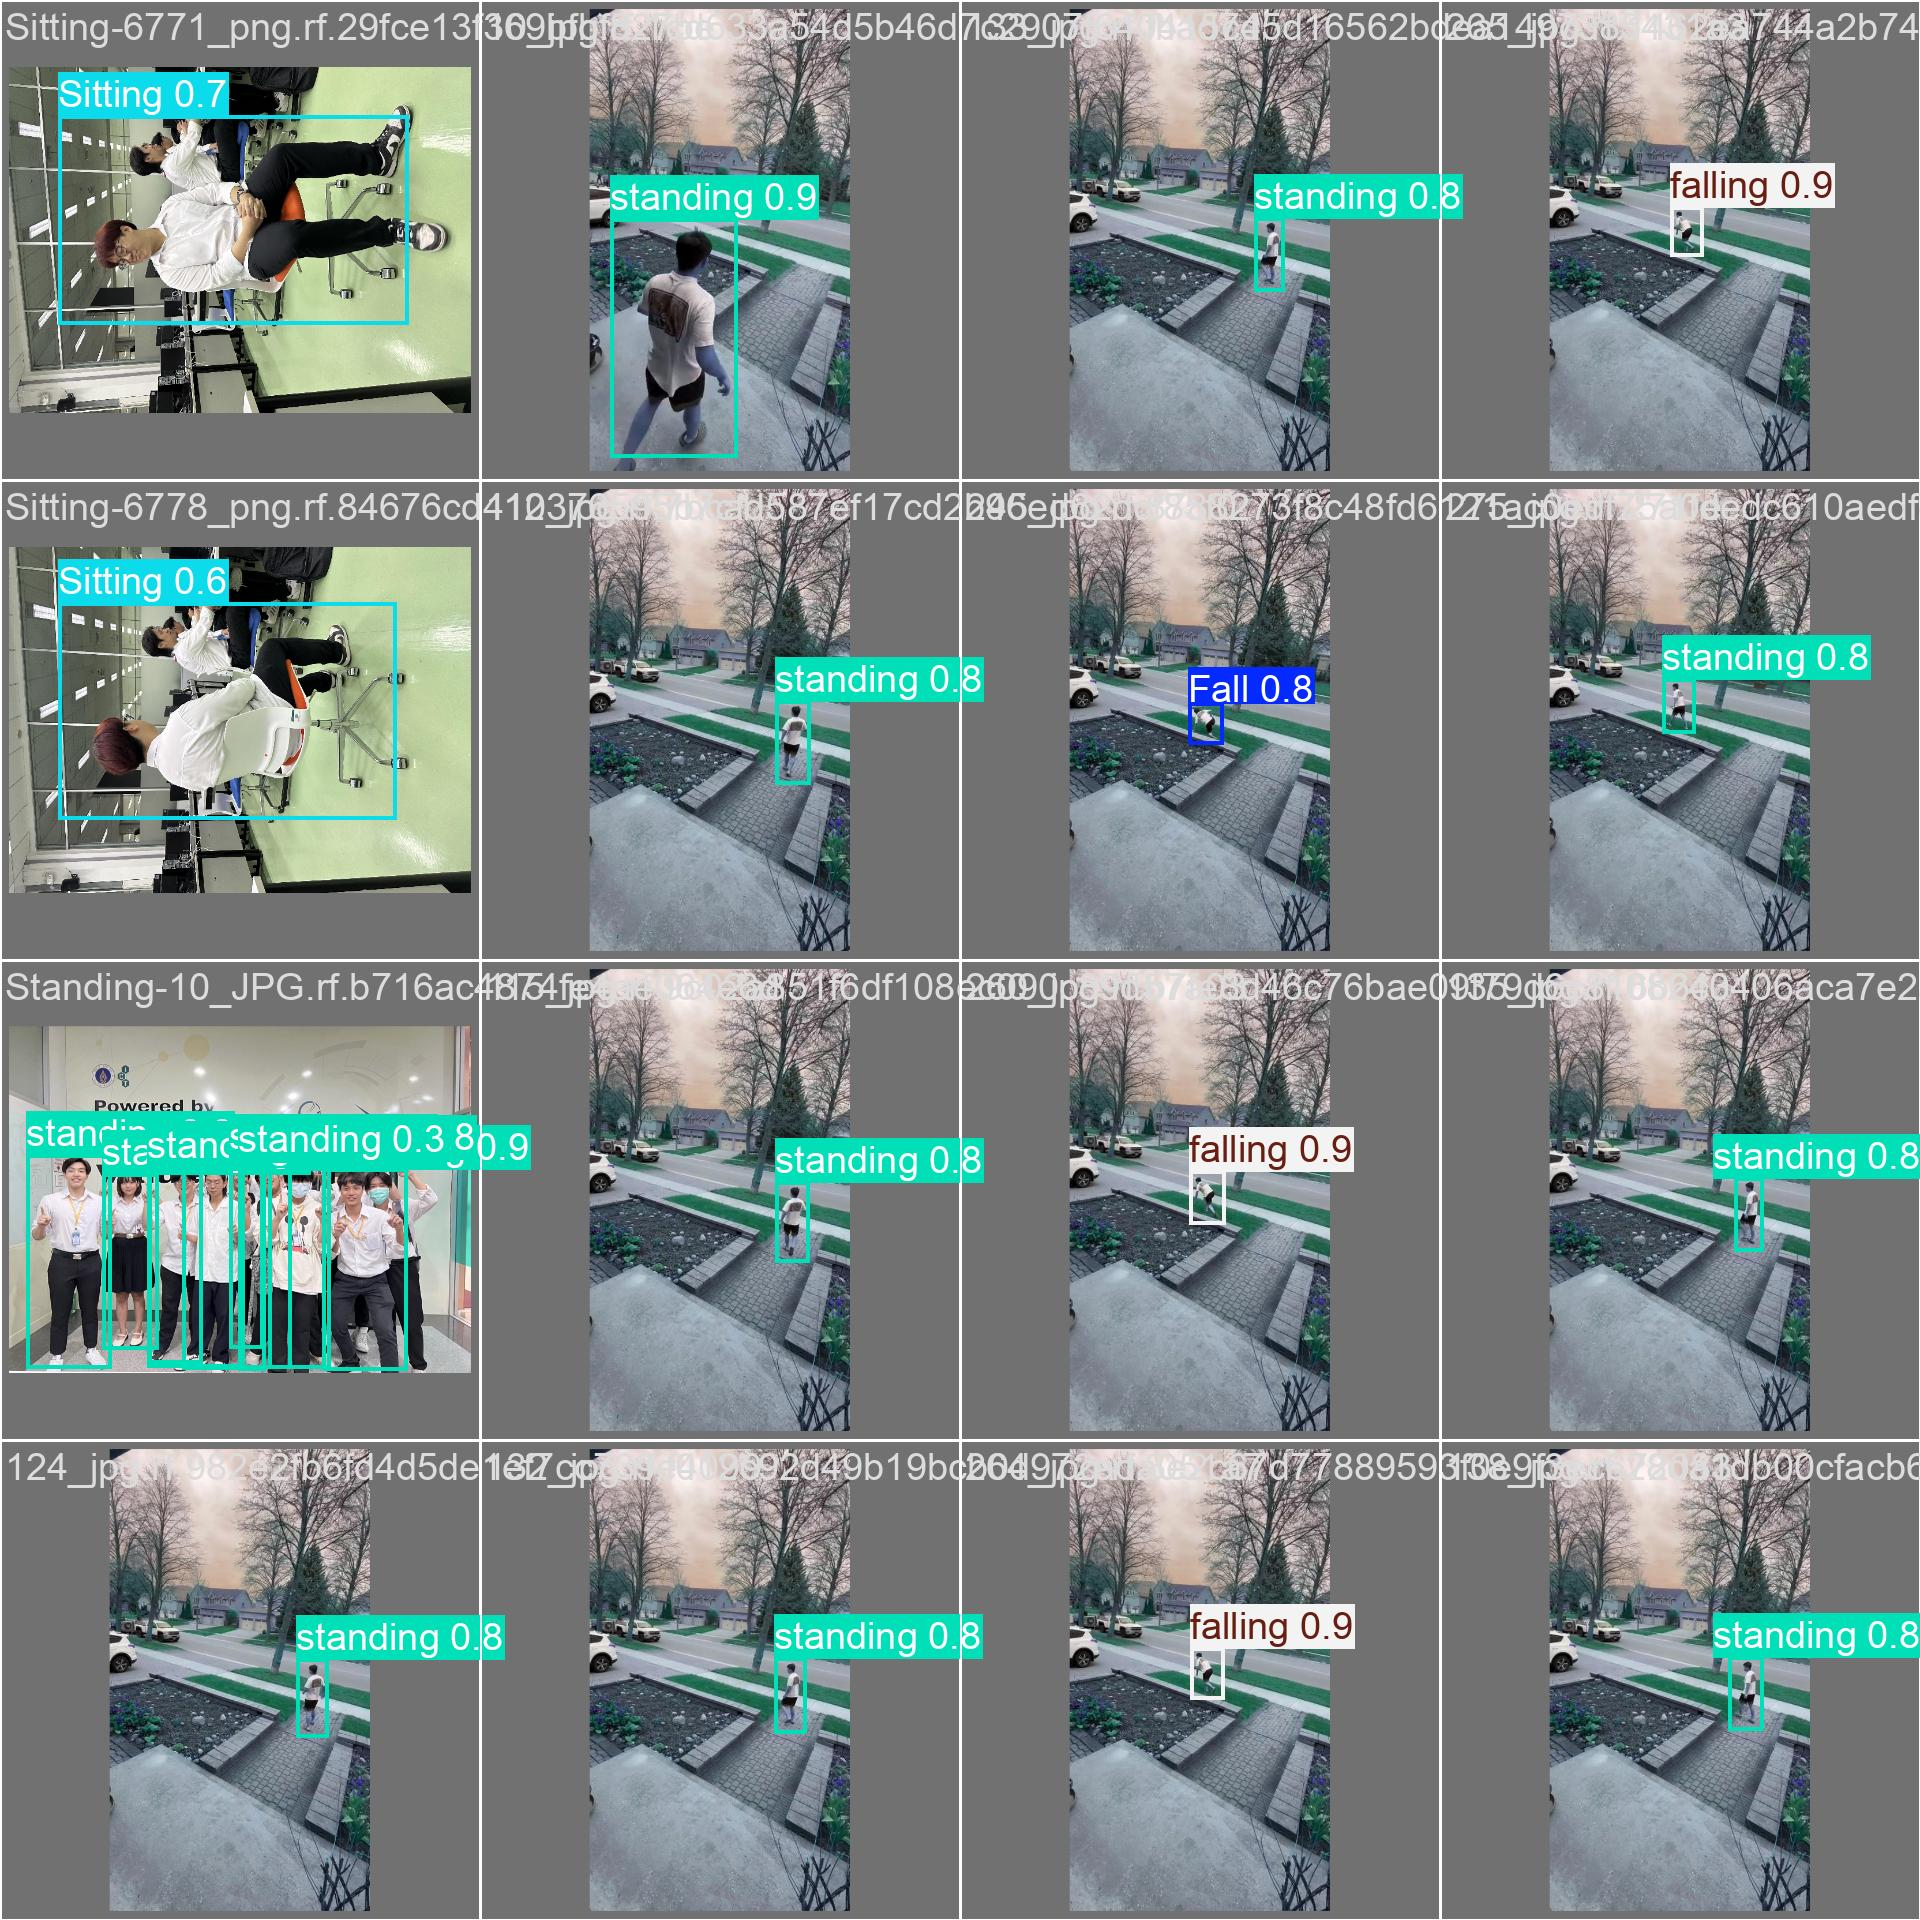

In [10]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/Colab Notebooks/Main data sci/runs/detect/train/val_batch0_pred.jpg', width=800)